In [14]:
import pybamm
import matplotlib.pyplot as plt

In [67]:
model = pybamm.lithium_ion.SPM({"SEI": "ec reaction limited"})
parameter_values = pybamm.ParameterValues(chemistry=pybamm.parameter_sets.Mohtat2020)
parameter_values.update(
{
    "SEI kinetic rate constant [m.s-1]": 1e-6,
    "Initial outer SEI thickness [m]": 2.5e-9,
}
)
experiment = pybamm.Experiment(
[
    ("Charge at 1C until 4.2V",
    "Hold at 4.2V until C/100",
    "Rest for 6 hours",)
]
)
sim = pybamm.Simulation(model, experiment=experiment, parameter_values=parameter_values)
pybamm.set_logging_level("NOTICE")
sol = sim.solve()

2021-03-08 17:04:17,200 - [NOTICE] simulation.solve(682): Cycle 1/1 (5.248 us elapsed) --------------------
2021-03-08 17:04:17,201 - [NOTICE] simulation.solve(697): Cycle 1/1, step 1/3: Charge at 1C until 4.2V
2021-03-08 17:04:17,328 - [NOTICE] simulation.solve(697): Cycle 1/1, step 2/3: Hold at 4.2V until C/100
2021-03-08 17:04:17,534 - [NOTICE] simulation.solve(697): Cycle 1/1, step 3/3: Rest for 6 hours
2021-03-08 17:04:17,909 - [NOTICE] simulation.solve(754): Finish experiment simulation, took 709.276 ms


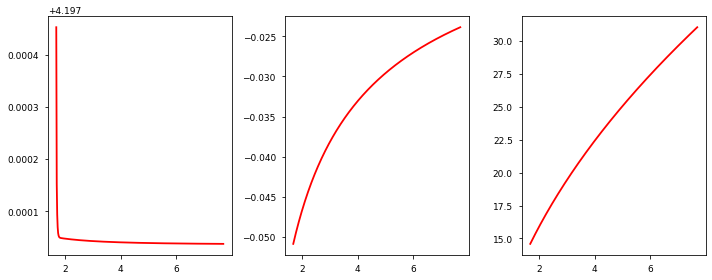

In [68]:
t = sol.cycles[0].steps[-1]["Time [h]"].data
V = sol.cycles[0].steps[-1]["Terminal voltage [V]"].data
j = sol.cycles[0].steps[-1]["X-averaged negative electrode SEI interfacial current density"].data
L = sol.cycles[0].steps[-1]["X-averaged outer negative electrode SEI thickness"].data

fig, ax = plt.subplots(1,3,figsize=(10,4))

ax[0].plot(t,V)
# ax[0].set_ylim([4.192,4.1924])

ax[1].plot(t,j)

ax[2].plot(t,L)

fig.tight_layout()

In [69]:
parameter_values.search("SEI")

Initial inner SEI thickness [m]	2.5e-09
Initial outer SEI thickness [m]	2.5e-09
Inner SEI electron conductivity [S.m-1]	8.95e-14
Inner SEI lithium interstitial diffusivity [m2.s-1]	1e-20
Inner SEI open-circuit potential [V]	0.1
Inner SEI partial molar volume [m3.mol-1]	9.585e-05
Inner SEI reaction proportion	0.5
Outer SEI open-circuit potential [V]	0.8
Outer SEI partial molar volume [m3.mol-1]	9.585e-05
Outer SEI solvent diffusivity [m2.s-1]	2.5000000000000002e-22
Ratio of inner and outer SEI exchange current densities	1.0
SEI kinetic rate constant [m.s-1]	1e-06
SEI open-circuit potential [V]	0.4
SEI reaction exchange current density [A.m-2]	1.5e-07
SEI resistivity [Ohm.m]	5000000.0


In [21]:
model.options

{'operating mode': 'current',
 'dimensionality': 0,
 'surface form': 'false',
 'convection': 'none',
 'side reactions': [],
 'interfacial surface area': 'constant',
 'current collector': 'uniform',
 'particle': 'Fickian diffusion',
 'particle shape': 'spherical',
 'electrolyte conductivity': 'default',
 'thermal': 'isothermal',
 'cell geometry': 'arbitrary',
 'external submodels': [],
 'SEI': 'ec reaction limited',
 'lithium plating': 'none',
 'SEI porosity change': 'false',
 'loss of active material': 'none',
 'working electrode': 'none',
 'particle cracking': 'none',
 'total interfacial current density as a state': 'true',
 'SEI film resistance': 'distributed'}